#**Mathematics in Machine Learning - Part 1 Visualization**

Politecnico di Torino

Alberto Maria Falletta S277971 


**DATA EXPLORATION**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path = "/content/bank-additional-full.csv"
pd.set_option("display.max_columns", None)

df = pd.read_csv(path, delimiter=';')

df['pdays'] = df['pdays'].replace(999, -1)
print(f"Presence of Nan values: {df.isnull().values.any()}")
print(f"Total number of 'unknown' values: {len(df[(df['job'] == 'unknown')]) + len(df[(df['marital'] == 'unknown')]) + len(df[(df['education'] == 'unknown')]) + len(df[(df['default'] == 'unknown')]) + len(df[(df['housing'] == 'unknown')]) + len(df[(df['loan'] == 'unknown')])}")
print(f"Number of records with at least one 'unknown' value: {len(df[(df['job'] == 'unknown') | (df['marital']== 'unknown') | (df['education']== 'unknown') | (df['default']== 'unknown') | (df['housing']== 'unknown') | (df['loan']== 'unknown')])}")

df_yes = df[df['y'] == "yes"]
df_no = df[df['y'] == "no"]

Presence of Nan values: False
Total number of 'unknown' values: 12718
Number of records with at least one 'unknown' value: 10700


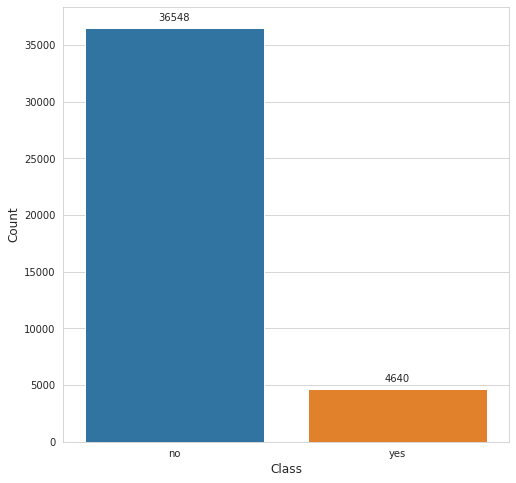

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="y", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig(fname="Class_count.png")
plt.show()

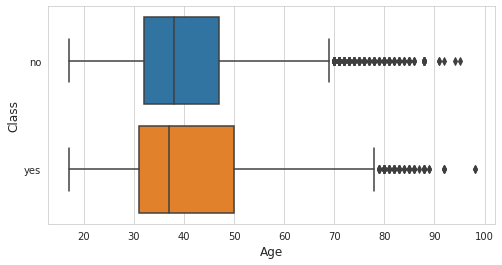

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.boxplot(x="age", y="y", data=df)
plt.ylabel('Class', fontsize=12)
plt.xlabel('Age', fontsize=12)

plt.show()

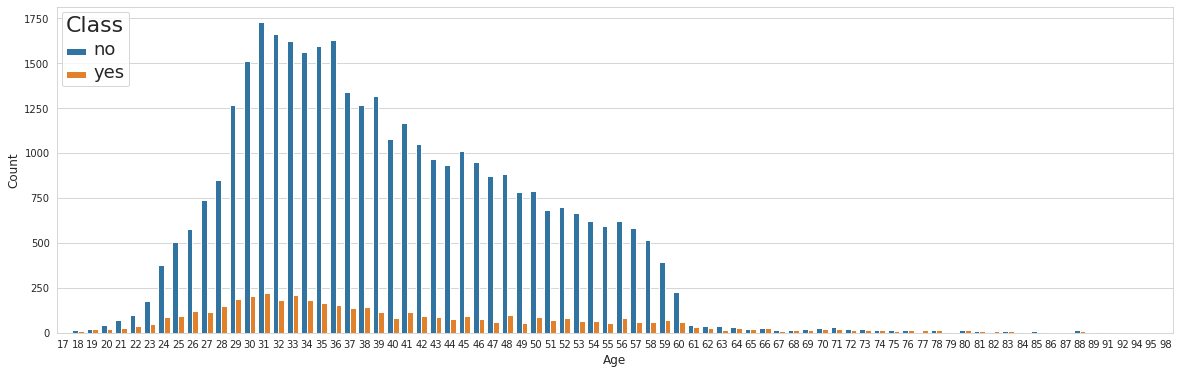

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x="age", hue="y", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age', fontsize=12)

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

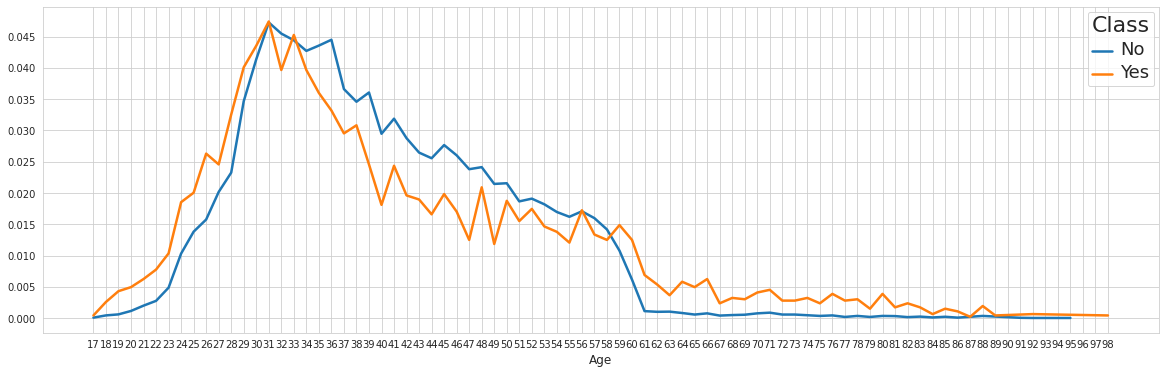

In [ ]:
plt.figure(figsize=(20,6))
x = df_yes['age'].value_counts().sort_index().divide(4640)
y = df_no['age'].value_counts().sort_index().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xticks([i for i in range(17, 99)])
plt.xlabel('Age', fontsize=12)
plt.yticks([i/200 for i in range(0, 10)])
plt.show()

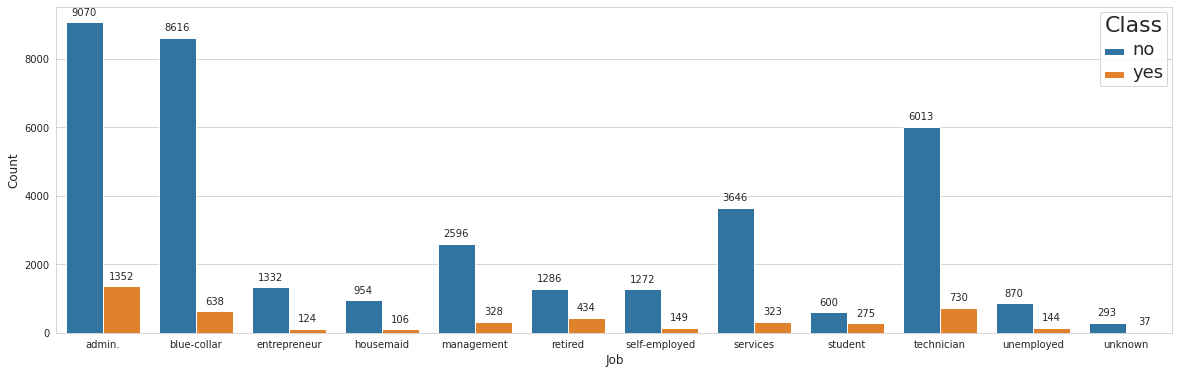

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x="job", hue="y", data=df, order=["admin.", "blue-collar",
                    "entrepreneur", "housemaid", "management", "retired",
                    "self-employed", "services", "student", "technician",  
                    "unemployed", "unknown"])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Job', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

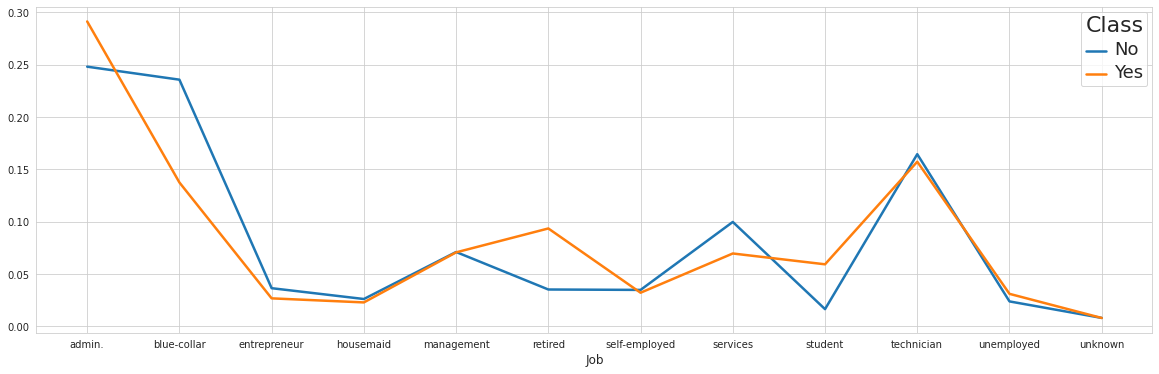

In [ ]:
plt.figure(figsize=(20,6))
x = df_yes['job'].value_counts().divide(4640)
y = df_no['job'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Job', fontsize=12)
plt.show()

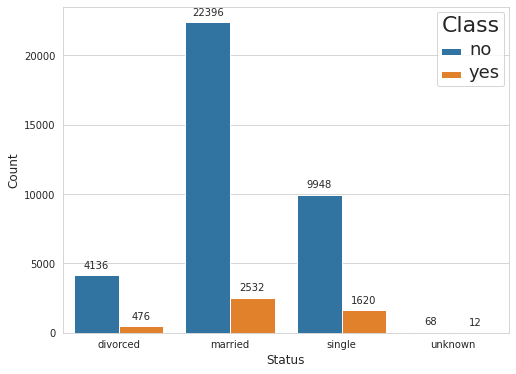

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="marital", hue="y", data=df, order=["divorced", "married", "single", "unknown"])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Status', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

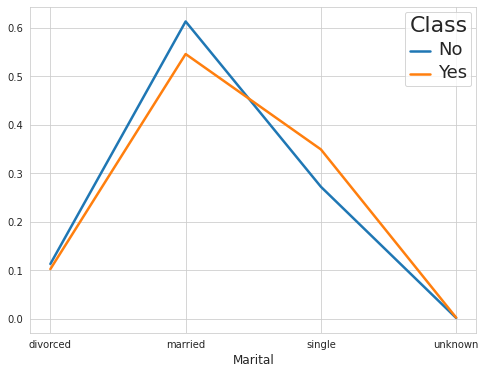

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['marital'].value_counts().divide(4640)
y = df_no['marital'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Marital', fontsize=12)
plt.show()

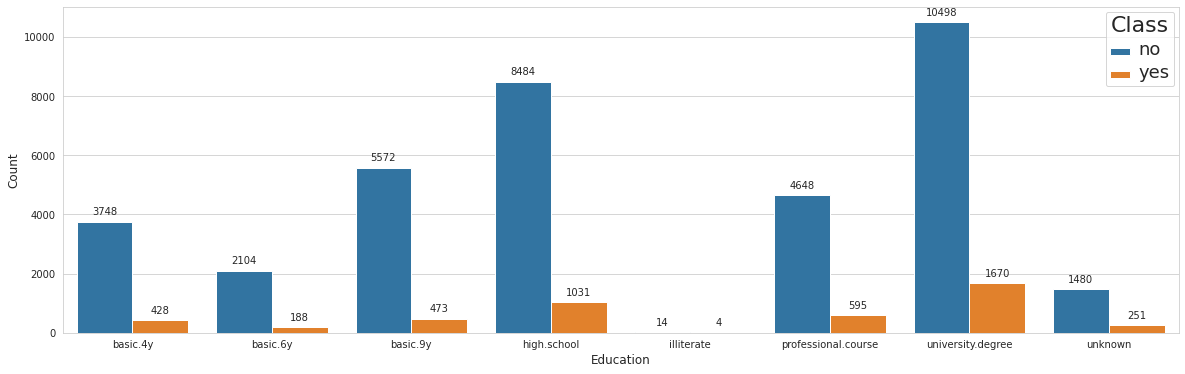

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x="education", hue="y", data=df, order=['basic.4y',
                'basic.6y', 'basic.9y', 'high.school', 'illiterate', 
                'professional.course', 'university.degree', 'unknown'])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Education', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

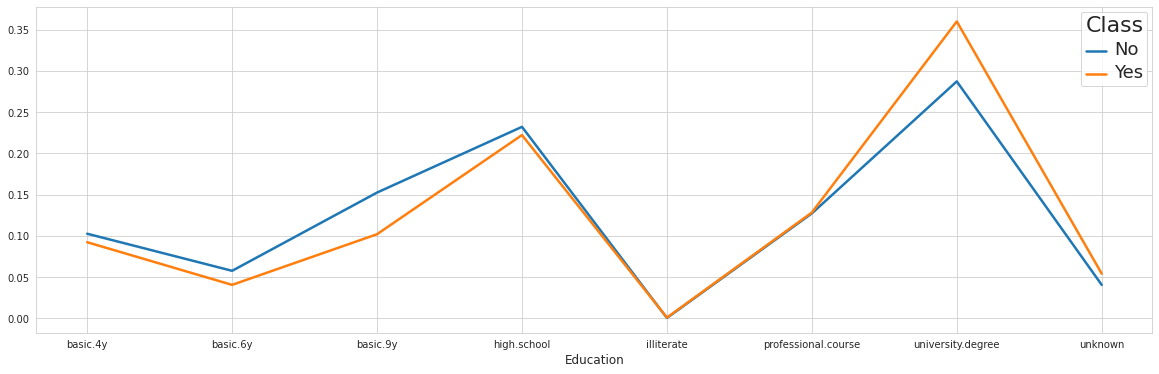

In [ ]:
plt.figure(figsize=(20,6))
x = df_yes['education'].value_counts().divide(4640)
y = df_no['education'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Education', fontsize=12)
plt.show()

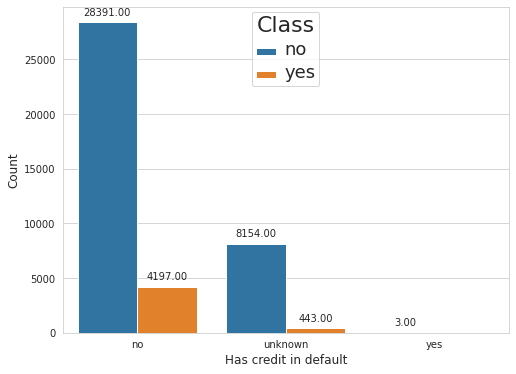

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="default", hue="y", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Has credit in default', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

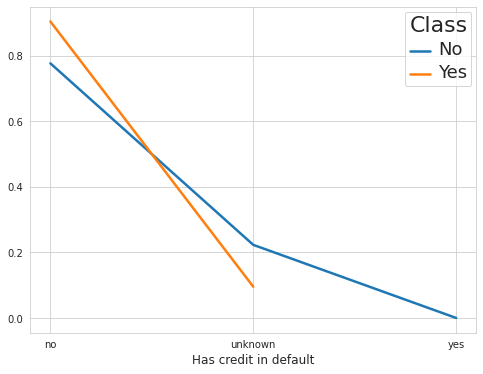

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['default'].value_counts().divide(4640)
y = df_no['default'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Has credit in default', fontsize=12)
plt.show()

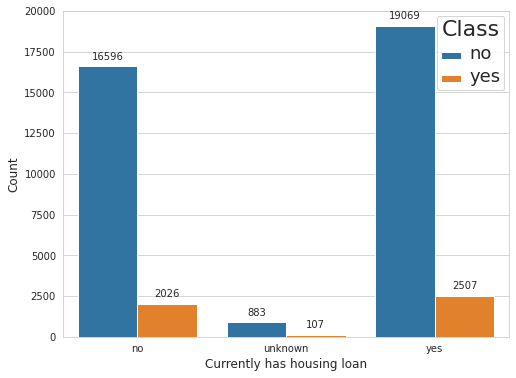

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="housing", hue="y", data=df, order=["no", "unknown", "yes"])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Currently has housing loan', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

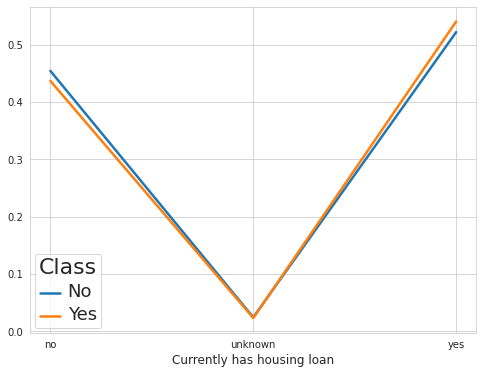

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['housing'].value_counts().divide(4640)
y = df_no['housing'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Currently has housing loan', fontsize=12)
plt.show()

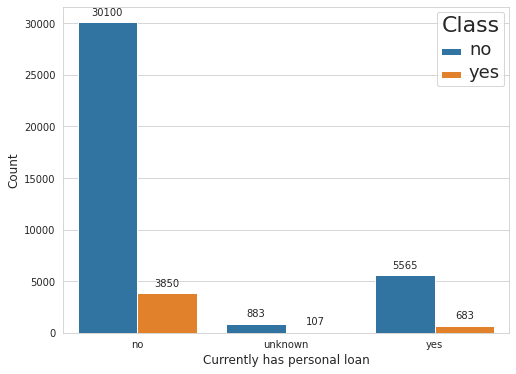

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="loan", data=df, hue="y", order=["no", "unknown", "yes"])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Currently has personal loan', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

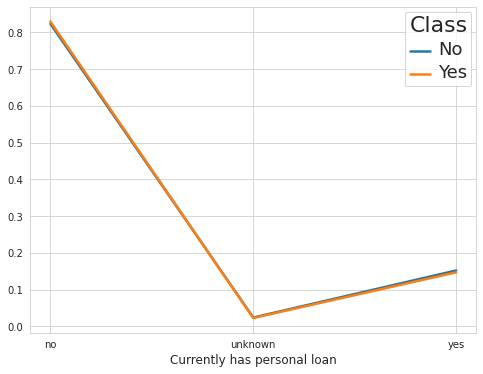

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['loan'].value_counts().divide(4640)
y = df_no['loan'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Currently has personal loan', fontsize=12)
plt.show()

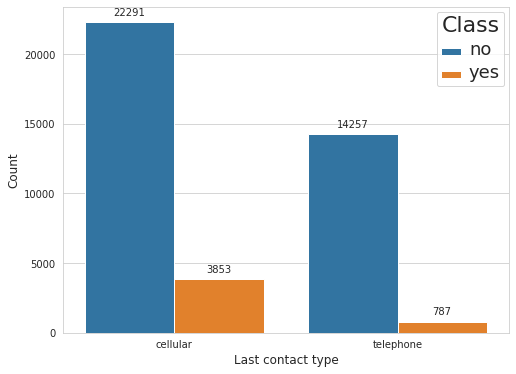

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="contact", data=df, hue="y", order=["cellular", "telephone"])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Last contact type', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

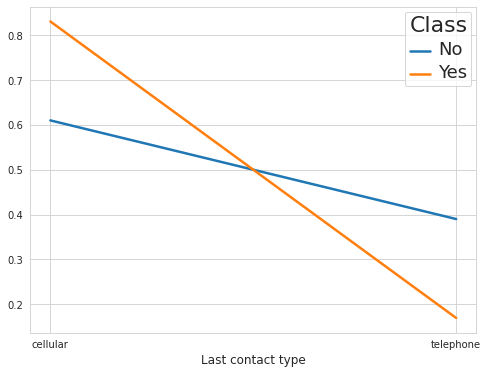

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['contact'].value_counts().divide(4640)
y = df_no['contact'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Last contact type', fontsize=12)
plt.show()

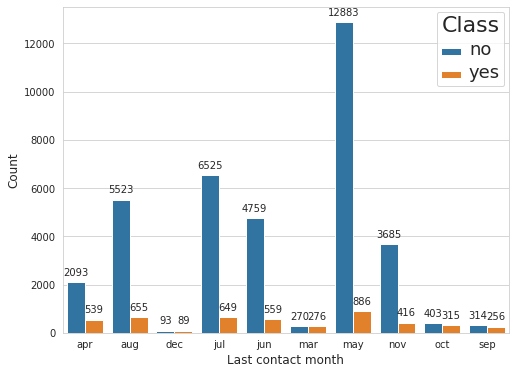

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="month", data=df, hue="y", order=["apr", "aug", "dec", "jul", "jun", "mar", "may", "nov", "oct", "sep"])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Last contact month', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

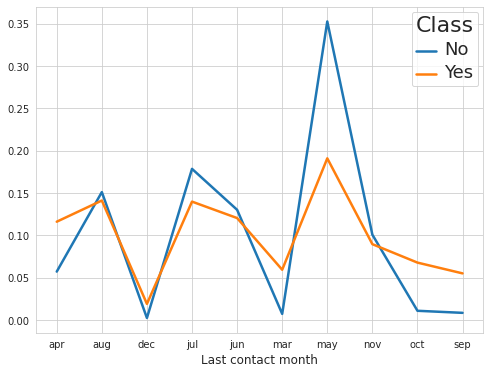

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['month'].value_counts().divide(4640)
y = df_no['month'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Last contact month', fontsize=12)
plt.show()

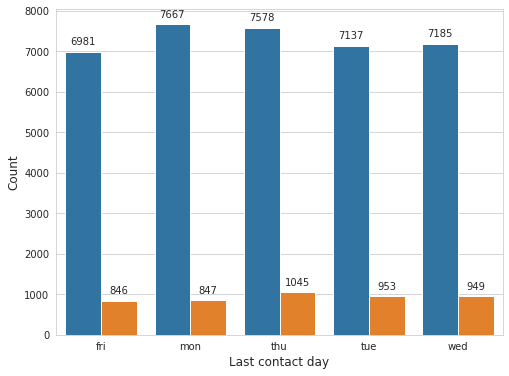

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="day_of_week", data=df, hue="y", order=["fri", "mon", "thu", "tue", "wed"])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Last contact day', fontsize=12)
plt.legend().remove()
# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

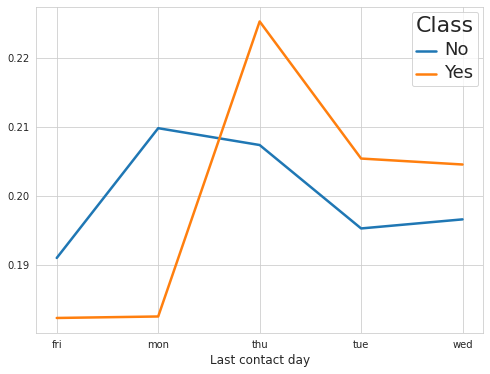

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['day_of_week'].value_counts().divide(4640)
y = df_no['day_of_week'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Last contact day', fontsize=12)
plt.show()

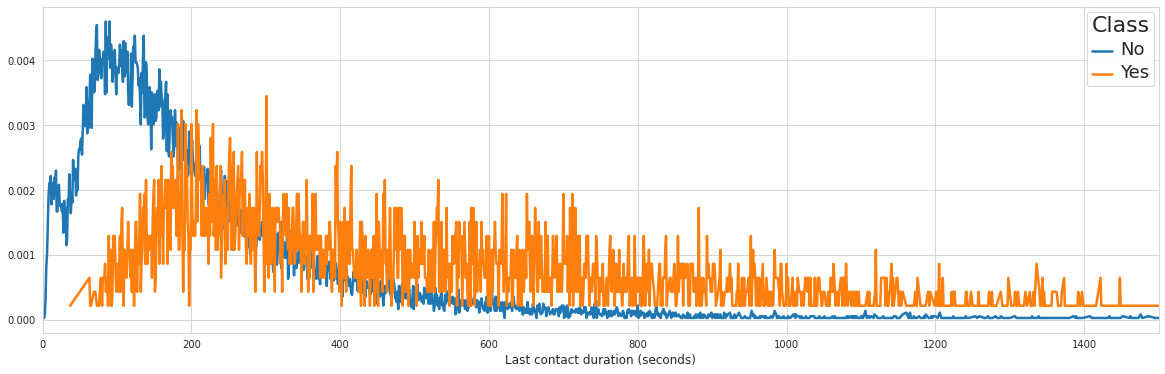

In [4]:
#plt.figure(figsize=(20,8))
#ax = sns.countplot(x="duration", data=df, color="royalblue")
#plt.ylabel('Count', fontsize=12)
#plt.xlabel('Duration', fontsize=12)
#plt.show()

plt.figure(figsize=(20,6))
x = df_yes['duration'].value_counts().sort_index().divide(4640)
y = df_no['duration'].value_counts().sort_index().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
# plt.xticks([i for i in range(17, 99)])
plt.xlabel('Last contact duration (seconds)', fontsize=12)
# plt.yticks([i/200 for i in range(0, 10)])
plt.xlim(0, 1500)

plt.show()

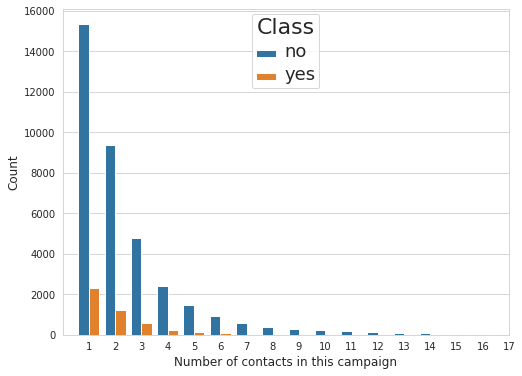

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x="campaign", data=df, hue="y")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of contacts in this campaign', fontsize=12)
plt.xlim(-1, 16)

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')


plt.show()

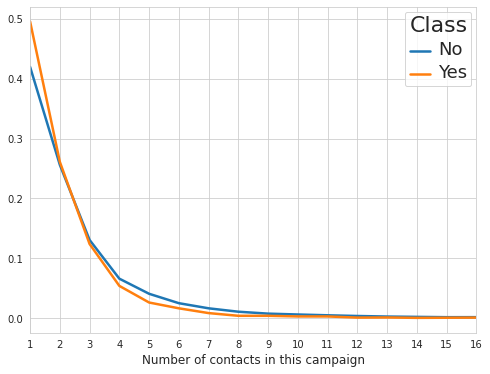

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['campaign'].value_counts().divide(4640)
y = df_no['campaign'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.xticks([i for i in range(1, 57)])
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Number of contacts in this campaign', fontsize=12)
plt.xlim(1, 16)
plt.show()

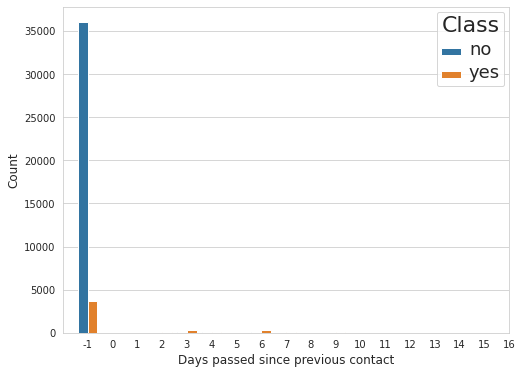

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="pdays", data=df, hue="y")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days passed since previous contact', fontsize=12)

plt.xlim(-1, 17)

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

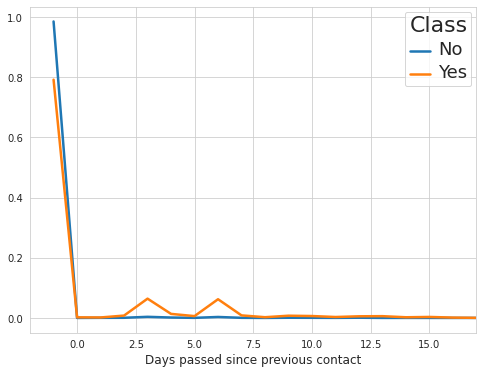

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['pdays'].value_counts().divide(4640)
y = df_no['pdays'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Days passed since previous contact', fontsize=12)
plt.xlim(-2, 17)
plt.show()

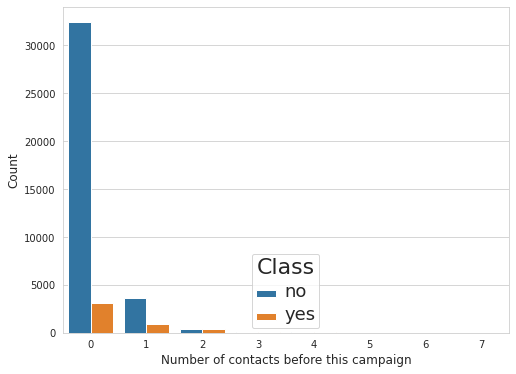

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="previous", data=df, hue="y")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of contacts before this campaign', fontsize=12)

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

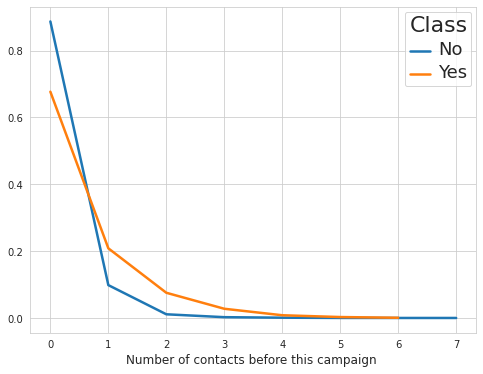

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['previous'].value_counts().divide(4640)
y = df_no['previous'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Number of contacts before this campaign ', fontsize=12)
plt.show()

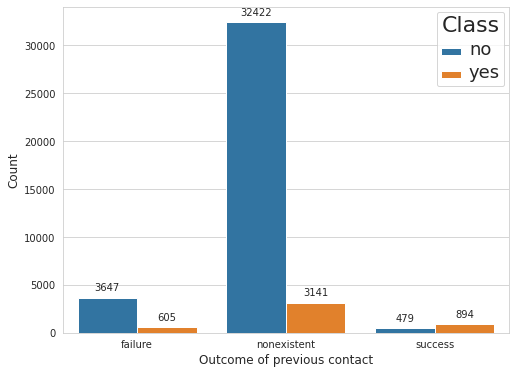

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="poutcome", data=df, hue="y", order=["failure", "nonexistent", "success"])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Outcome of previous contact', fontsize=12)

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

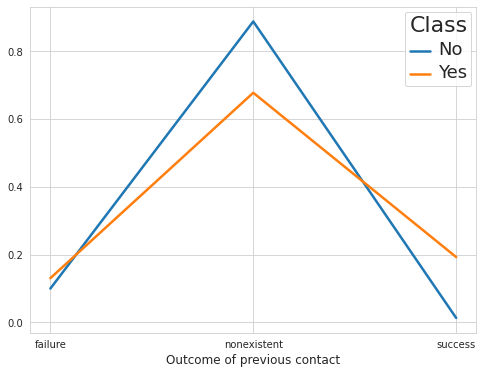

In [ ]:
plt.figure(figsize=(8,6))
x = df_yes['poutcome'].value_counts().divide(4640)
y = df_no['poutcome'].value_counts().divide(36548)
bx = sns.lineplot(data=y, label="No", linewidth=2.5)
ax = sns.lineplot(data=x, label="Yes", linewidth=2.5)
ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.xlabel('Outcome of previous contact', fontsize=12)
plt.show()

In [ ]:
# NORMALIZATION OF THE LAST FIVE
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

df[["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]] = min_max_scaler.fit_transform(df[["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]])

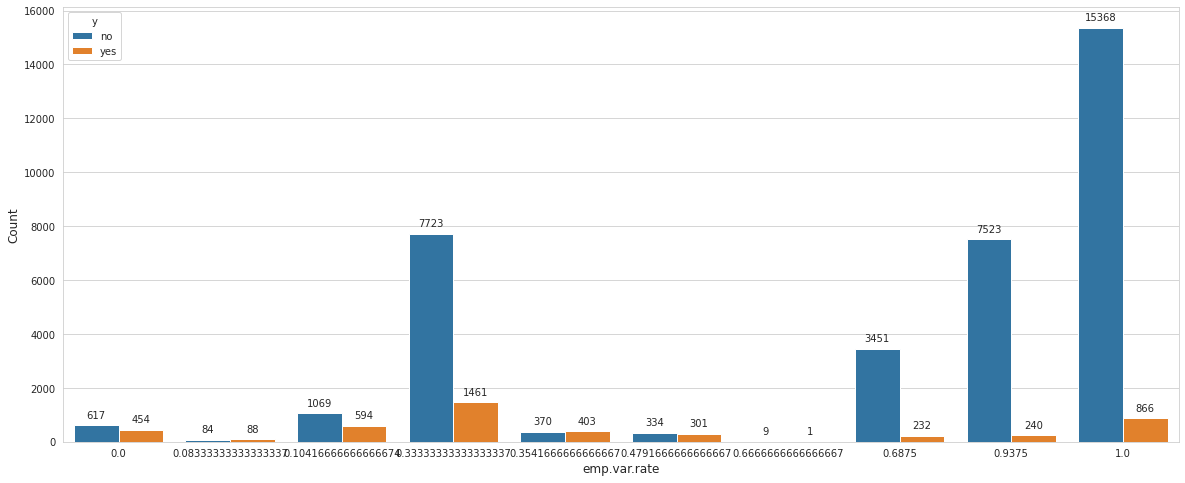

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="emp.var.rate", data=df, hue="y")
plt.ylabel('Count', fontsize=12)
plt.xlabel('emp.var.rate', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

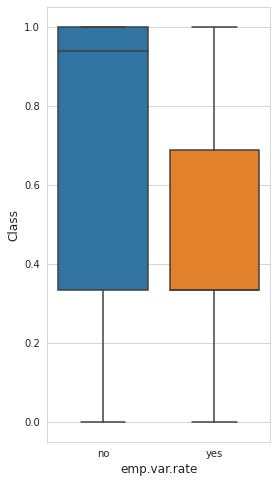

In [ ]:
plt.figure(figsize=(4,8))
ax = sns.boxplot(y="emp.var.rate", x="y", data=df)
plt.ylabel('Class', fontsize=12)
plt.xlabel('emp.var.rate', fontsize=12)

plt.show()

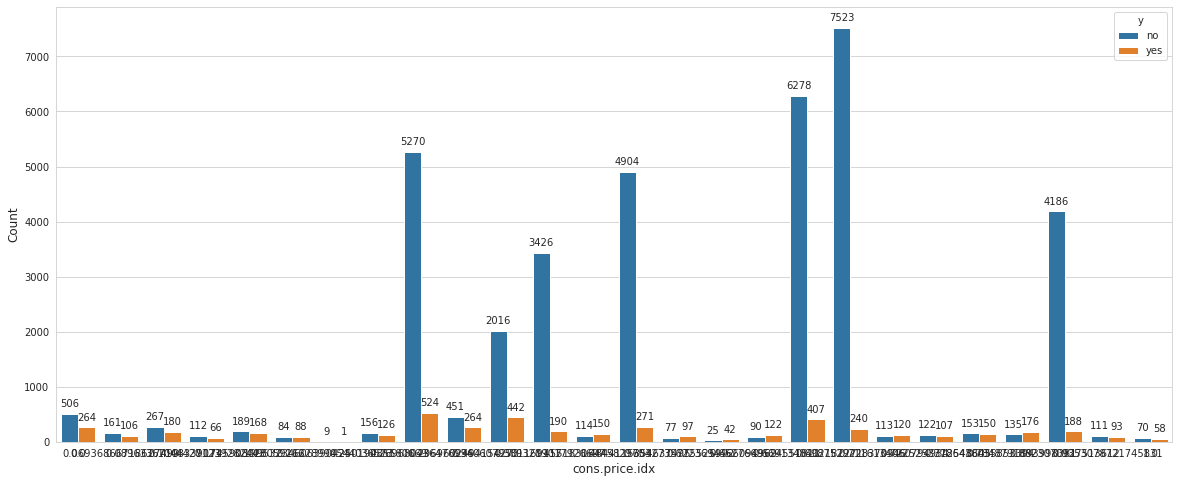

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="cons.price.idx", data=df, hue="y")
plt.ylabel('Count', fontsize=12)
plt.xlabel('cons.price.idx', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

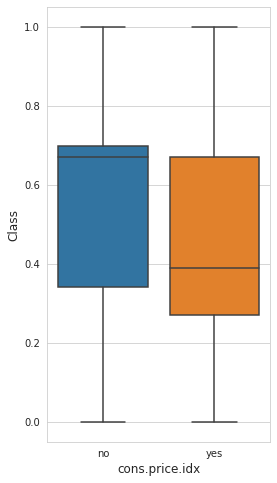

In [ ]:
plt.figure(figsize=(4,8))
ax = sns.boxplot(y="cons.price.idx", x="y", data=df)
plt.ylabel('Class', fontsize=12)
plt.xlabel('cons.price.idx', fontsize=12)

plt.show()

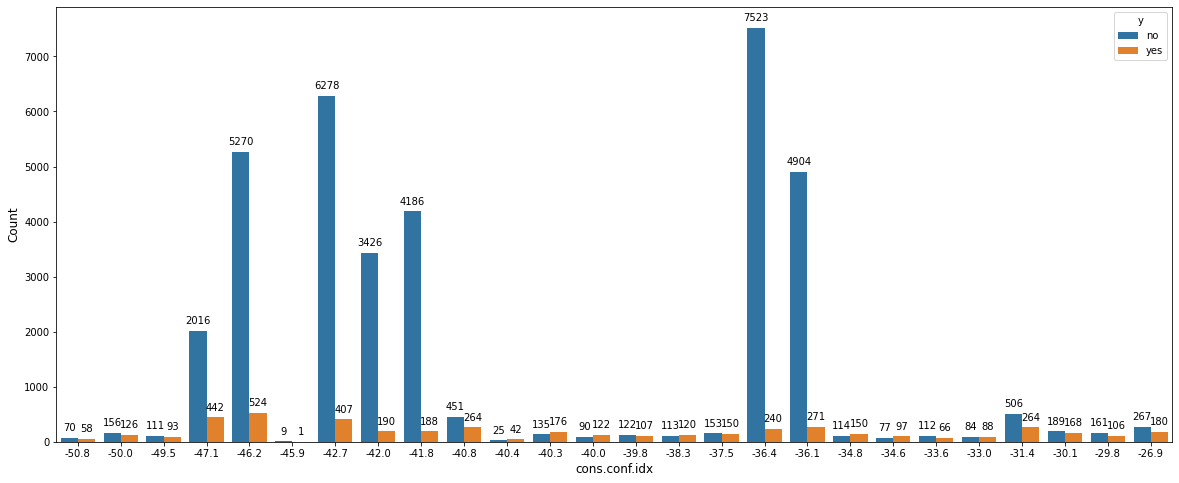

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="cons.conf.idx", data=df, hue="y")
plt.ylabel('Count', fontsize=12)
plt.xlabel('cons.conf.idx', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

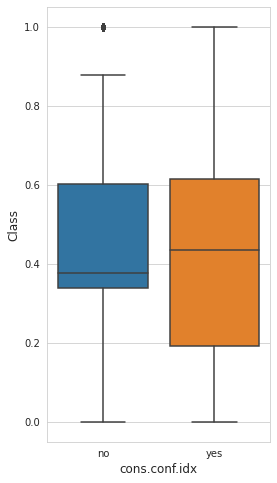

In [ ]:
plt.figure(figsize=(4,8))
ax = sns.boxplot(y="cons.conf.idx", x="y", data=df)
plt.ylabel('Class', fontsize=12)
plt.xlabel('cons.conf.idx', fontsize=12)

plt.show()

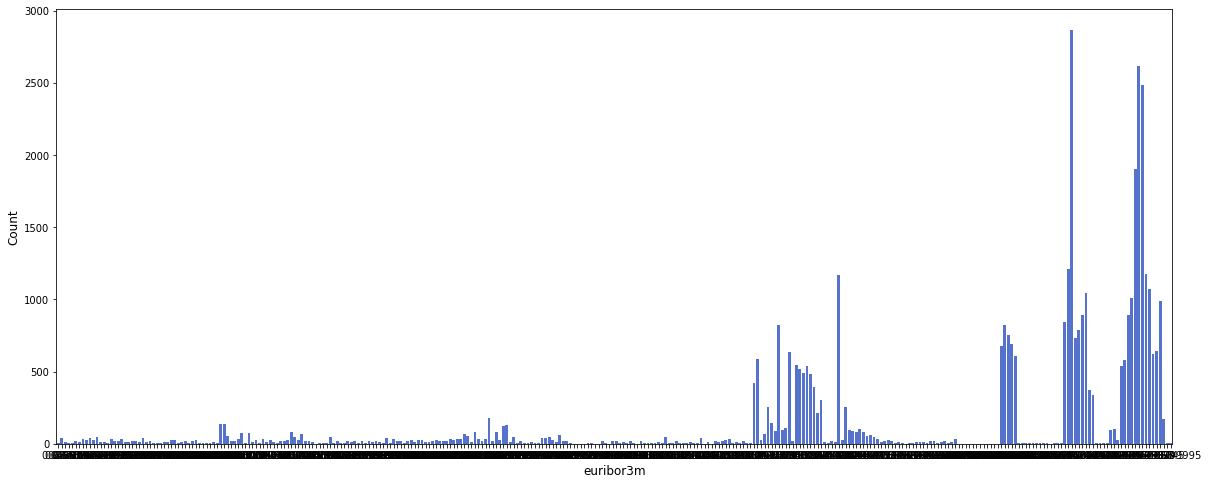

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="euribor3m", data=df, color="royalblue")
plt.ylabel('Count', fontsize=12)
plt.xlabel('euribor3m', fontsize=12)
plt.show()

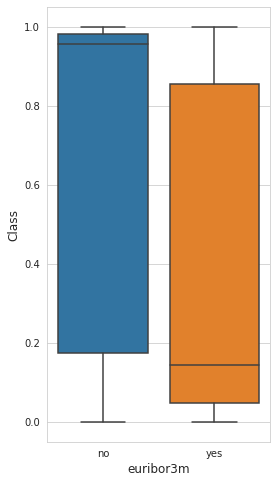

In [ ]:
plt.figure(figsize=(4,8))
ax = sns.boxplot(y="euribor3m", x="y", data=df)
plt.ylabel('Class', fontsize=12)
plt.xlabel('euribor3m', fontsize=12)

plt.show()

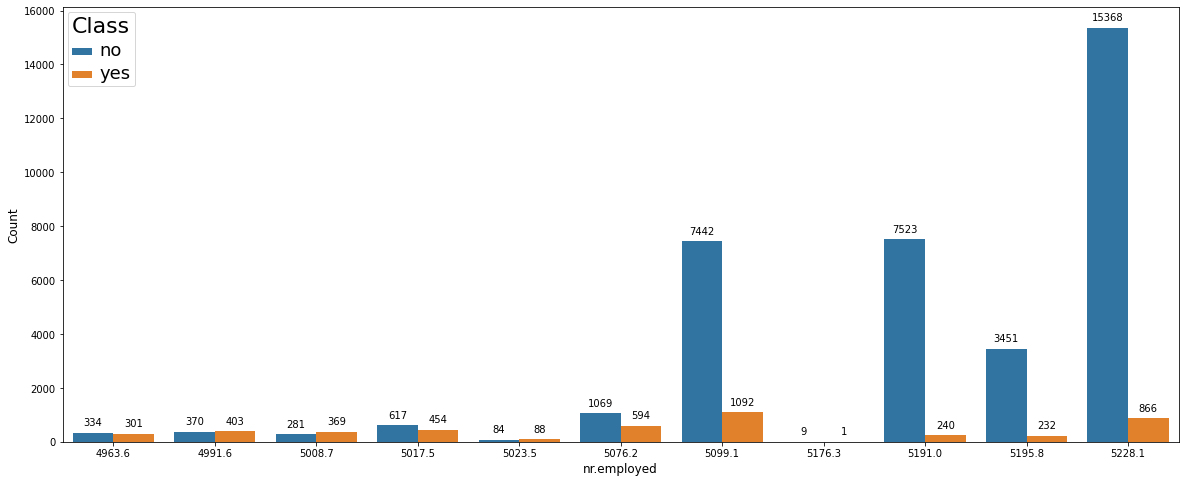

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="nr.employed", data=df, hue="y")
plt.ylabel('Count', fontsize=12)
plt.xlabel('nr.employed', fontsize=12)

# add numbers on top of bars
for p in ax.patches:
  ax.annotate(format(p.get_height(), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.legend().set_title('Class')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.setp(ax.get_legend().get_texts(), fontsize='18')

plt.show()

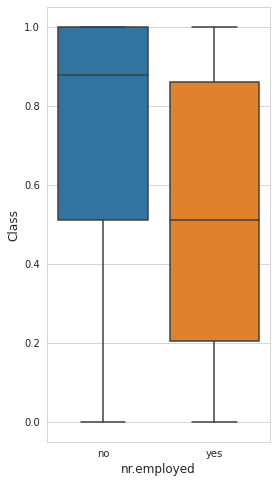

In [ ]:
plt.figure(figsize=(4,8))
ax = sns.boxplot(y="nr.employed", x="y", data=df)
plt.ylabel('Class', fontsize=12)
plt.xlabel('nr.employed', fontsize=12)

plt.show()